# PREDICCION E INFLUENCIA DE VARIABLES EN EL CHURN CON ARBOL DE DECISION
Se utiliza AD para medir la influencia de variables en la salida de clientes lo que permite tomar mejores decisiones.

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('customers.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data['Churn']=data['Churn'].map({'Yes':1, 'No':0})

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# Variables mas influyentes para la prediccion

In [6]:
cols = ['SeniorCitizen','tenure','Contract','PaymentMethod',
        'OnlineSecurity','TechSupport','TotalCharges','Churn']

In [7]:
data=data[cols]

In [8]:
data.head()

,SeniorCitizen,tenure,Contract,PaymentMethod,OnlineSecurity,TechSupport,TotalCharges,Churn
0,0,1,Month-to-month,Electronic check,No,No,29.85,0
1,0,34,One year,Mailed check,Yes,No,1889.5,0
2,0,2,Month-to-month,Mailed check,Yes,No,108.15,1
3,0,45,One year,Bank transfer (automatic),Yes,Yes,1840.75,0
4,0,2,Month-to-month,Electronic check,No,No,151.65,1


In [9]:
import numpy as np
import pandas as pd

data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [10]:
data=pd.get_dummies(data,columns=['Contract','PaymentMethod','OnlineSecurity','TechSupport'],drop_first=False)

In [11]:
data.head()

,SeniorCitizen,tenure,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,0,1,29.85,0,True,False,False,False,False,True,False,True,False,False,True,False,False
1,0,34,1889.50,0,False,True,False,False,False,False,True,False,False,True,True,False,False
2,0,2,108.15,1,True,False,False,False,False,False,True,False,False,True,True,False,False
3,0,45,1840.75,0,False,True,False,True,False,False,False,False,False,True,False,False,True
4,0,2,151.65,1,True,False,False,False,False,True,False,True,False,False,True,False,False


In [12]:
X=data.drop('Churn',axis=1)
y=data['Churn']

# LIBRERIA SKLEARN PARA PREDICCION

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Aplico el modelo de arbol de decision y sus condiciones para ajustar la prediccion 

In [16]:
tree = DecisionTreeClassifier(
    criterion='entropy',        
    max_depth=8,                
    min_samples_split=5,        
    min_samples_leaf=2,         
    ccp_alpha=0.001,            
    class_weight='balanced',    
    random_state=42
)

# ENTRENAMIENTO DE VARIABLES

In [17]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight='balanced',
                       criterion='entropy', max_depth=8, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)

# PREDICCION

In [18]:
y_pred=tree.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report

# MATRIZ DE CONFUSION Y REPORTE DE CLASIFICACION

In [20]:
print(confusion_matrix(y_test,y_pred))

[[1069  470]
 [ 114  460]]


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.69      0.79      1539
           1       0.49      0.80      0.61       574

    accuracy                           0.72      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.79      0.72      0.74      2113



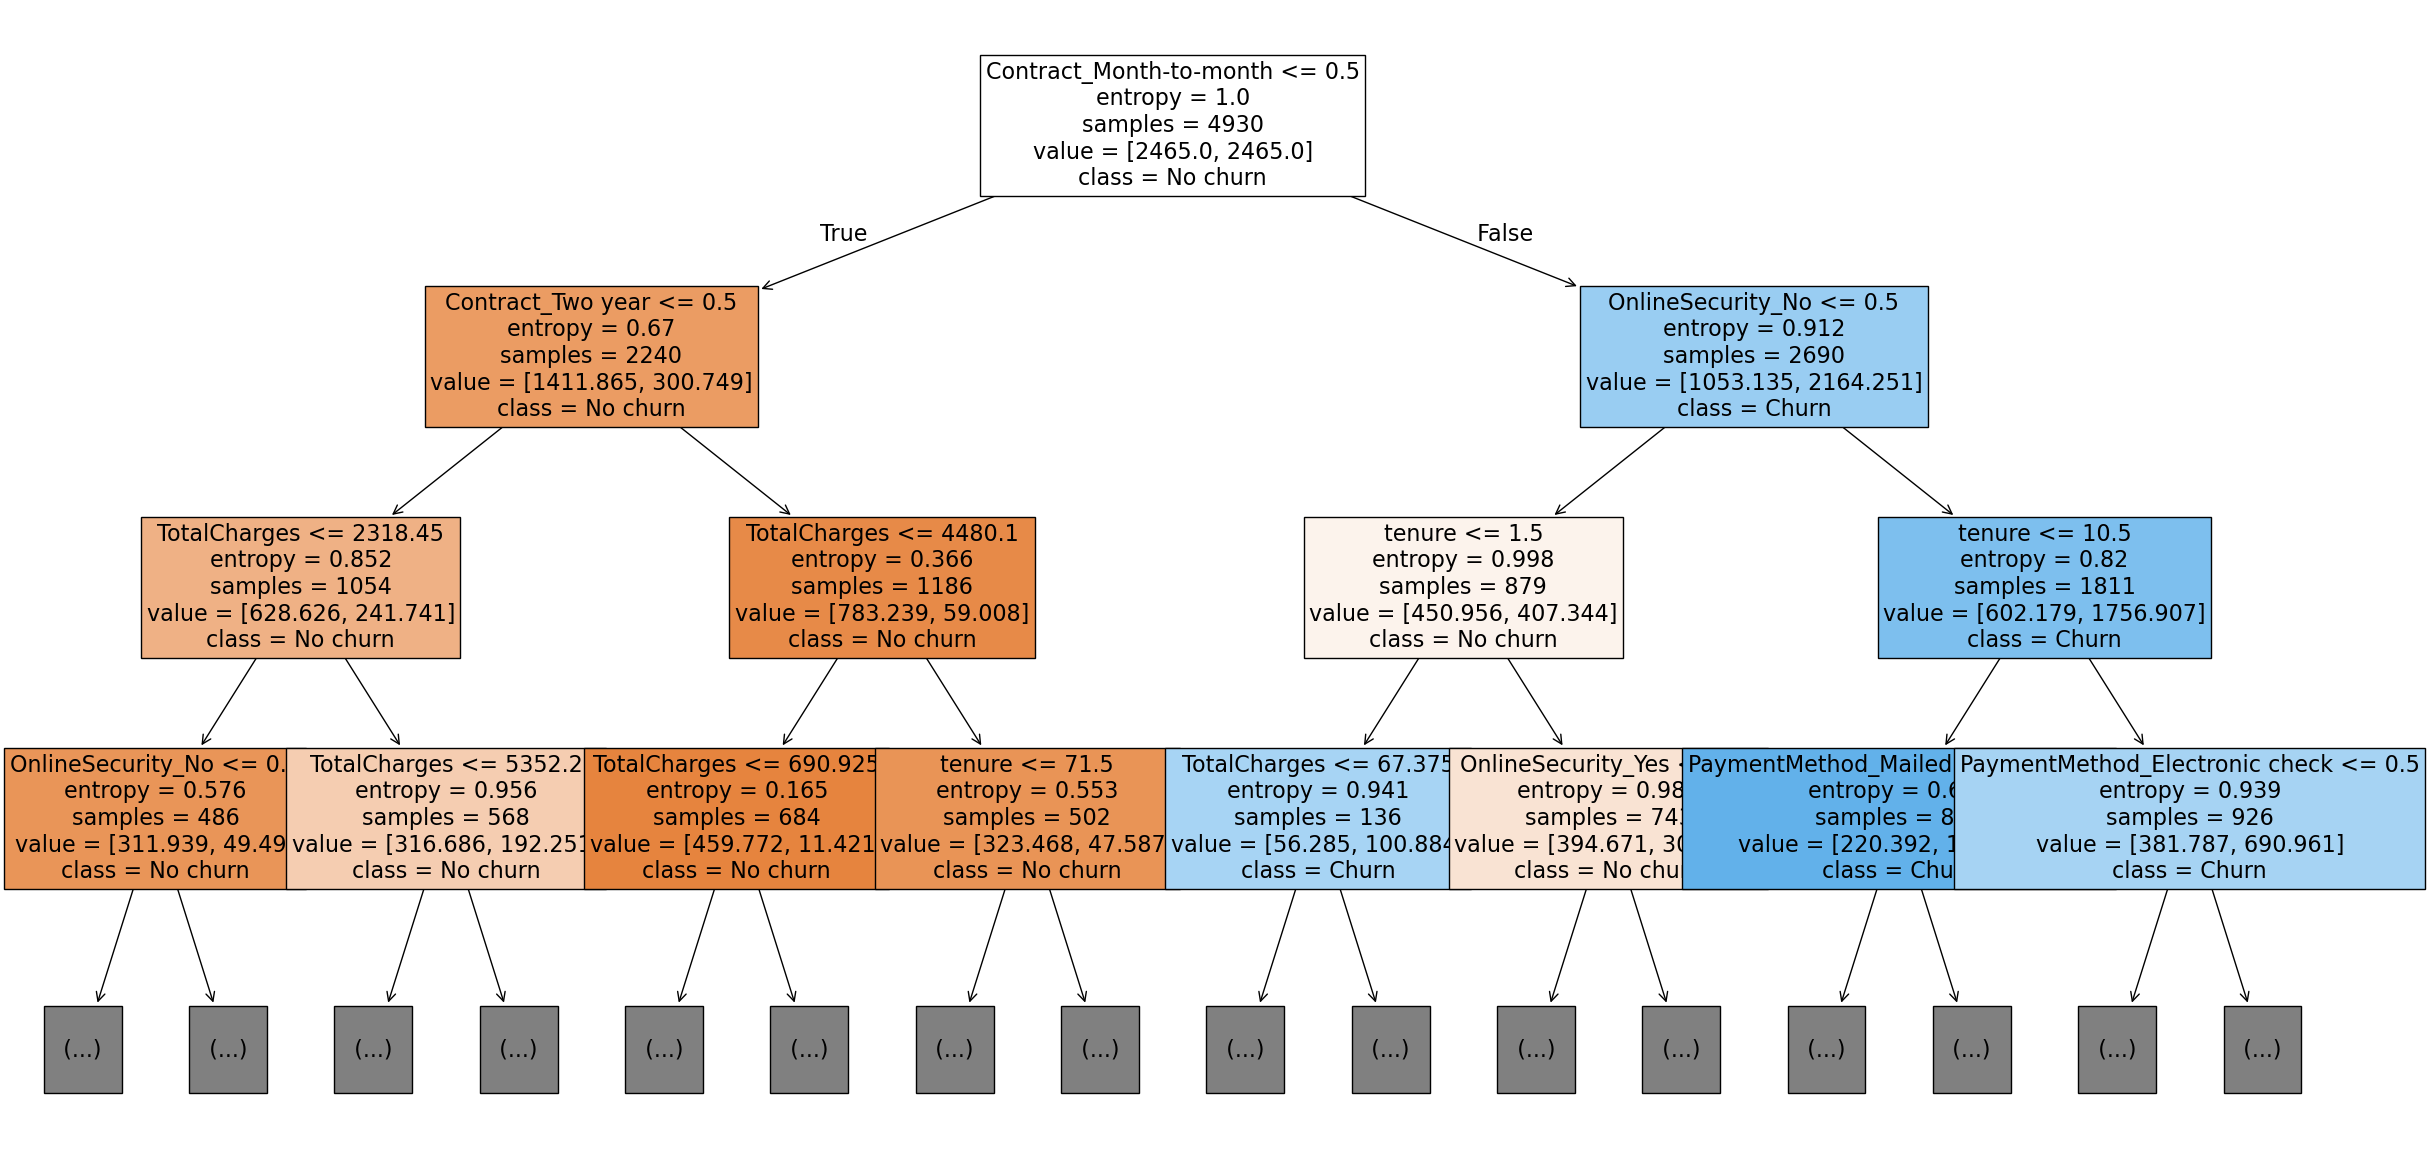

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15)) 
plot_tree(
    tree, 
    feature_names=X_train.columns, 
    class_names=["No churn","Churn"], 
    filled=True, 
    max_depth=3,   
    fontsize=16    
)
plt.show()


In [23]:
import pandas as pd

importances=tree.feature_importances_
features=X_train.columns

df=pd.DataFrame({
    'Variable':features,
    'Importancia':importances
}).sort_values('Importancia',ascending=True)




# IMPORTANCIA EN LA PREDICCION

In [24]:
print('Arbol de Decision')
print('\n----------')
df

Arbol de Decision

----------


,Variable,Importancia
6,PaymentMethod_Bank transfer (automatic),0.000000
4,Contract_One year,0.000000
14,TechSupport_No internet service,0.000000
11,OnlineSecurity_No internet service,0.000000
15,TechSupport_Yes,0.002915
13,TechSupport_No,0.008017
7,PaymentMethod_Credit card (automatic),0.008217
9,PaymentMethod_Mailed check,0.011515
0,SeniorCitizen,0.012511
12,OnlineSecurity_Yes,0.015061


# PROCESOS INTERNOS DE PREDICCION

In [25]:

from sklearn.tree import export_text

reglas = export_text(tree, feature_names=list(X.columns))
print("Primeras 10 reglas internas del Árbol de Decisión:")
print(reglas[:600])



Primeras 10 reglas internas del Árbol de Decisión:
|--- Contract_Month-to-month <= 0.50
|   |--- Contract_Two year <= 0.50
|   |   |--- TotalCharges <= 2318.45
|   |   |   |--- OnlineSecurity_No <= 0.50
|   |   |   |   |--- PaymentMethod_Credit card (automatic) <= 0.50
|   |   |   |   |   |--- TotalCharges <= 1331.08
|   |   |   |   |   |   |--- TotalCharges <= 147.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- TotalCharges >  147.50
|   |   |   |   |   |   |   |--- PaymentMethod_Mailed check <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- PaymentMethod_Mailed check >  0.50
|   
